In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ipw
import matplotlib

Assuming that for each food item of size $v$, we obtain 10 noisy observations $u$ of the light bouncing off the food item, we get: 

\begin{align*}
p(v, \bar{u}) &= p(v|\bar{u}) p(\bar{u}) = p(\bar{u}|v) p(v) \\
&= p(u_9|u_{0:8}, v) p(u_8|u_{0:7}, v) ... p(u_0| v) p(v) \\
&= p(u_9| v) p(u_8| v) ... p(u_0| v) p(v) \\
&= \prod_{i=0}^{9} (p(u_i| v) p(v) 
\end{align*}

This used an assumption that the noise in the 10 observations is indpendent.

This gives us for the Free Energy using $\phi$ as our estimate for $v$(dropping constants):

\begin{align*}
F_0 &= \ln p(\phi, u_0) =  p(u_0|\phi) p(\phi) \\
F_1 &= \ln \prod_{i=0}^{1} (p(u_i| \phi) p(\phi) \\
&= \sum_{i=0}^{1} \ln p(u_i| \phi) p(\phi) \\
&\vdots \\
F_9 &= \sum_{i=0}^{9} \ln p(u_i| \phi) p(\phi) \\
&= F_8 + \ln p(u_9| \phi) p(\phi) \\
&= F_8 + \ln p(u_9| \phi) + \ln p(\phi)
\end{align*}

Assuming Normal distributions for the size of the food item and the noise on the observed light intensity, this gives:

\begin{align*}
F_0 &= \ln f(\phi; v_p,1/R_p) + \ln f(u_0; g(\phi), 1/R_u) \\
&= \ln \left[ \frac{1}{\sqrt{2 \pi /R_p}} \exp \left(-\frac{R_p(\phi - v_p)^2}{2}\right)\right] 
+ \ln \left[ \frac{1}{\sqrt{2 \pi /R_u}} \exp \left(-\frac{R_u(u_0 - g(\phi))^2}{2}\right)\right] \\
&= \ln \frac{1}{\sqrt{2 \pi}} + \frac{1}{2} \ln R_p - \frac{R_p(\phi - v_p)^2}{2} 
+ \ln \frac{1}{\sqrt{2 \pi}} + \frac{1}{2} \ln R_u - \frac{R_u(u_0 - g(\phi))^2}{2} \\
&= \frac{1}{2} \left( \ln R_p - R_p(\phi - v_p)^2 + \ln R_u - R_u(u_0 - g(\phi))^2 \right) + C. \\
\\
F_1 &= 2 \ln f(\phi; v_p,1/R_p) + \ln f(u_0; g(\phi), 1/R_u) + \ln f(u_1; g(\phi), 1/R_u) \\
&= \frac{1}{2} \left( 2\ln R_p - 2R_p(\phi - v_p)^2 + 2\ln R_u - R_u(u_0 - g(\phi))^2 - R_u(u_1 - g(\phi))^2 \right) + C. \\
\\
F_9 &= 10 \ln f(\phi; v_p,1/R_p) + \sum_{i=0}^{9} \ln f(u_i; g(\phi), 1/R_u) 
\\
&= \frac{1}{2} \left( 10\ln R_p - 10R_p(\phi - v_p)^2 + 10\ln R_u - \sum_{i=0}^{9} R_u(u_i - g(\phi))^2 \right) + C. \\
\end{align*} 


This gives for the derivative of $F$ over $\phi$: 

\begin{align*}
\frac{\partial{F_0}}{\partial{\phi}} &= R_p(v_p - \phi) + R_u(u_0 - g(\phi)) g'(\phi)\\
\\
\frac{\partial{F_1}}{\partial{\phi}} &= 2R_p(v_p - \phi) + \sum_{i=0}^{1} R_u(u_i - g(\phi)) g'(\phi) \\
\\
\frac{\partial{F_9}}{\partial{\phi}} &= 10R_p(v_p - \phi) + \sum_{i=0}^{9} R_u(u_i - g(\phi)) g'(\phi) \\
&= 10\varepsilon_p + 10 g'(\phi) R_u (\frac{1}{10}\sum_{i=0}^{9} u_i - g(\phi)) \\
\end{align*}

More generally, after $N$ observations of the same food item, we can write:

\begin{align*}
\frac{\partial{F_{N-1}}}{\partial{\phi}} &= N(-\varepsilon_p + g'(\phi) \varepsilon_u) \\
\end{align*}

where
\begin{align*}
\varepsilon_p &= R_p(\phi - v_p)\\
\varepsilon_u &= R_u(u_m - g(\phi))\\
u_m &= \frac{1}{N}\sum_{i=0}^{N-1} u_i
\end{align*}

Fortunately, $u_m$ can be updated online as new observations come in.

The gradient of $F$ with respect to $R_p$ is simply given by: 

\begin{align*}
\frac{\partial{F_{N-1}}}{\partial{R_p}} &= \frac{1}{2} \left( \frac{N}{R_p} - N (\phi -v_p)^2 \right)
\end{align*}

and with respect to $R_u$:

\begin{align*}
\frac{\partial{F_{N-1}}}{\partial{R_u}} &= \frac{1}{2} \left( \frac{N}{R_u} - \sum_{i=0}^{N-1} (u_i - g(\phi))^2 \right)
\end{align*}

Unfortunately, the latter needs all observations $u_i$ to calculate, since $g(\phi)$ continues to change throughout the observations. So in this form, it is no longer an online algorithm.

If our observation function is linear, e.g., $g(\phi) = \phi$:

\begin{align*}
\frac{\partial{F}}{\partial{\phi}} &= R_p (v_p - \phi) + R_u (u_m - \phi) = 0 \\
(R_p + R_u)\phi &= R_p v_p + R_u u_m \\
\phi &= \frac{R_p v_p + R_u u_m}{R_p + R_u}
\\
\frac{\partial{F_{N-1}}}{\partial{R_u}} &= \frac{1}{2} \left(\frac{N}{R_u} - \sum_{i=0}^{N-1} (u_i - \frac{R_p v_p + R_u u_m}{R_p + R_u})^2 \right) \\
 &= \frac{1}{2} \left(\frac{N}{R_u} - \frac{1}{(R_p + R_u)^2} \sum_{i=0}^{N-1} (R_p u_i + R_u u_i - R_p v_p - R_u u_m)^2 \right) \\
 &= \frac{1}{2} \left(\frac{N}{R_u} - \frac{1}{(R_p + R_u)^2} \sum_{i=0}^{N-1} (R_p (u_i - v_p) + R_u (u_i - u_m))^2 \right) \\
&= \frac{1}{2} \left(\frac{N}{R_u} - \frac{1}{(R_p + R_u)^2} \sum_{i=0}^{N-1} (R_p (u_i - v_p))^2 \right) \\
&= \frac{1}{2} \left(\frac{N}{R_u} - \frac{R_p^2}{(R_p + R_u)^2} \sum_{i=0}^{N-1} (u_i - v_p)^2 \right) \\
\end{align*}


<IPython.core.display.Javascript object>


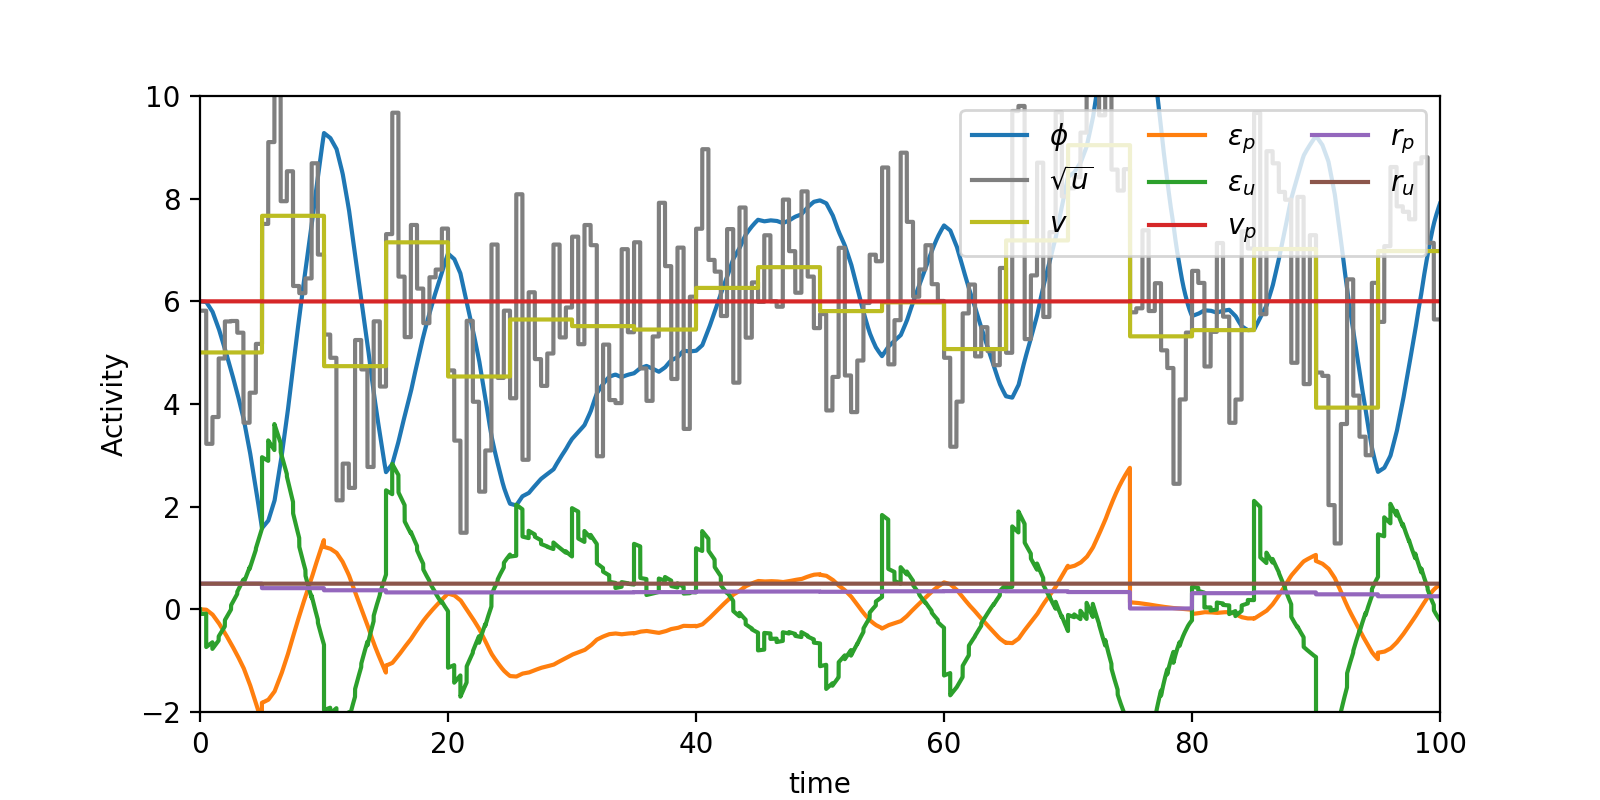

SEJveChjaGlsZHJlbj0oVkJveChjaGlsZHJlbj0oRmxvYXRTbGlkZXIodmFsdWU9NC4wLCBjb250aW51b3VzX3VwZGF0ZT1GYWxzZSwgZGVzY3JpcHRpb249dSd0YXUnLCBtYXg9MjAuMCwgbWnigKY=


In [18]:
from IPython.display import display

def fig_2g(CU):
    global state, params
    
    def g(v):
        return v

    def dg_dphi(v):
        return 1

    def reset_all():
        global state, params
        phi    = mu_p
        e_p    = 0
        e_u    = 0
        v_p    = mu_p
        r_p    = R_p
        r_u    = R_u
        state  = np.asarray([phi, e_p, e_u], dtype=float)
        params = np.asarray([v_p, r_p, r_u], dtype=float)

    def draw_fig2g(tau, w_params, reset, cont):
        global state, params

        def dphi_dt(phi, e_p, e_u, v_p, r_p, r_u, u, v, u_m, uv2m):
            return e_u * dg_dphi(phi) - e_p

        def ep(phi, e_p, e_u, v_p, r_p, r_u, u, v, u_m, uv2m):
            return (phi - v_p) * r_p
        
        def eu(phi, e_p, e_u, v_p, r_p, r_u, u, v, u_m, uv2m):
            return (u_m - g(phi)) * r_u
        
        def dvp(phi, e_p, e_u, v_p, r_p, r_u, u, v, u_m, uv2m):
            return e_p

        def drp(phi, e_p, e_u, v_p, r_p, r_u, u, v, u_m, uv2m):
            return (1/r_p - (phi - v_p)**2)/2.0

        def dru(phi, e_p, e_u, v_p, r_p, r_u, u, v, u_m, uv2m):
            return (1/r_u - uv2m * r_p**2 / (r_p + r_u)**2)/2.0
                
        if reset == True:
            reset_all()
        [phi, e_p, e_u] = state
        [v_p, r_p, r_u] = params

        [h.remove() for h in ax.get_children() if isinstance(h, matplotlib.lines.Line2D)]
        trace  = np.zeros((steps, 10))
        trace[0, 0:3] = state
        trace[0, 3:6] = params
        
        for t in range(steps-1):
            if (t*dt)%5 == 0:
                v = max(np.random.normal(mu_p, np.sqrt(1/R_p)), 0)
                trace[t, 7] = v
                i = 0

            if (t*dt)%.5 == 0:
                u = max(np.random.normal(g(v), np.sqrt(1/R_u)), 0)
                trace[t, 6] = u
                u_m = (i*trace[t-1,8] + u)/(i+1)
                uv2m = (i*trace[t-1,9] + (u - v_p)**2)/(i+1)
                trace[t, 8] = u_m
                trace[t, 9] = uv2m
                i += 1

            state[0] += dt / tau * i* dphi_dt(*trace[t])
#             state[0] = v
            state[1] = ep(*trace[t])
            state[2] = eu(*trace[t])
            trace[t+1, 0:3] = state
            trace[t+1, 3:6] = params
            trace[t+1, 6] = u
            trace[t+1, 7] = v
            trace[t+1, 8] = u_m
            trace[t+1, 9] = uv2m

            if (t*dt + 10*dt)%.5 == 0:
                params += 0.1 * w_params * np.array([0*dvp(*trace[t+1]), 0*drp(*trace[t+1]), 0*dru(*trace[t+1])])
                trace[t+1, 3:6] = params


            if (t*dt + 10*dt)%5 == 0:
                params += 0.1 * w_params * np.array([dvp(*trace[t+1]), i*drp(*trace[t+1]), 0*dru(*trace[t+1])])
                trace[t+1, 3:6] = params


        ax.plot(np.arange(steps) * dt, trace[:,0], color='C0')
        ax.plot(np.arange(steps) * dt, (trace[:,6]), color='C7')
        ax.plot(np.arange(steps) * dt, trace[:,7], color='C8')
        ax.plot(np.arange(steps) * dt, trace[:,1], color='C1')
        ax.plot(np.arange(steps) * dt, trace[:,2], color='C2')
        ax.plot(np.arange(steps) * dt, trace[:,3], color='C3')
        ax.plot(np.arange(steps) * dt, trace[:,4], color='C4')
        ax.plot(np.arange(steps) * dt, trace[:,5], color='C5')
        plt.legend([r'$\phi$', r'$\sqrt{u}$', r'$v$', 
                    r'$\varepsilon_p$', r'$\varepsilon_u$', r'$v_p$',   
                    r'$r_p$', r'$r_u$'], ncol=3, loc=1)


    # set real world mean and variance of food size and light intensity
    mu_p    = 6.0      
    R_p     = 1/2.0
    R_u     = 1/2.0

    # simulation parameters
    dt      = 0.001
    dur     = 100
    steps   = int(dur/dt)

    # initialise state and parameter estimates
    reset_all()
    
    tau       = ipw.FloatSlider(value=4.0, min=0.1, max=20, step=0.1, continuous_update=CU) 
    w_params  = ipw.FloatSlider(value=0.01, min=0.01, max=2, step=0.01, continuous_update=CU) 
    sliders   = ipw.VBox([tau, w_params]) 
    reset     = ipw.ToggleButton(value=False, description='Reset', button_style='info')
    cont      = ipw.ToggleButton(value=False, description='Continue', button_style='info')
    buttons   = ipw.VBox([reset, cont])
    controls  = ipw.HBox([sliders, buttons])

    fig = plt.figure(figsize=(8,4), num='Fig 2g')
    ax  = fig.add_subplot(1, 1, 1)
    myplot = ipw.interactive(draw_fig2g, tau=tau, w_params=w_params, reset=reset, cont=cont)
    cont.value = True
    display(controls)
    plt.xlabel('time')
    plt.ylabel('Activity')
    plt.axis([0, dur, -2, 10])

    
fig_2g(False)